# Dataset import

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('car data.csv') #read dataset

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
for (Name,Data) in data.iteritems():
    print(data[Name].unique())# check unique values

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

# Visualizations

In [5]:
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data.isnull().sum() #check null values each status

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.isnull().sum().sum() #chekc all null value status

0

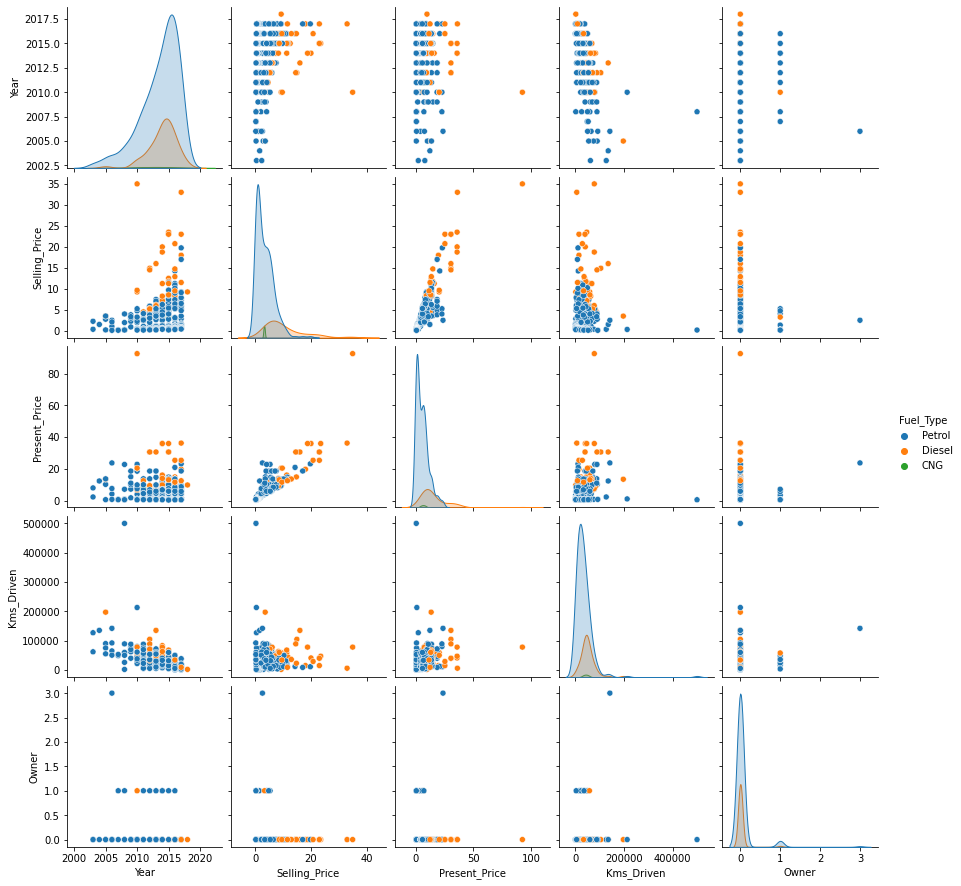

In [8]:
sea.pairplot(data, hue='Fuel_Type')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

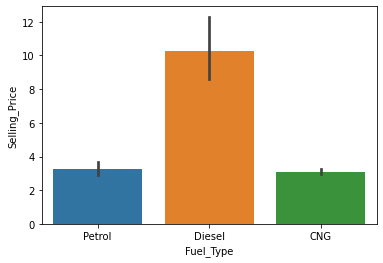

In [9]:
sea.barplot(x='Fuel_Type', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

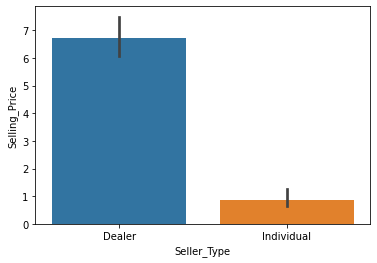

In [10]:
sea.barplot(x='Seller_Type', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

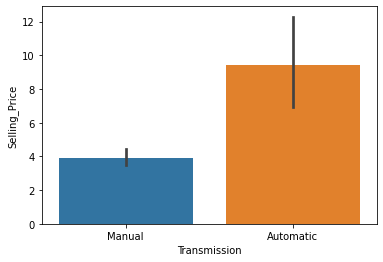

In [11]:
sea.barplot(x='Transmission', y='Selling_Price', data=data)

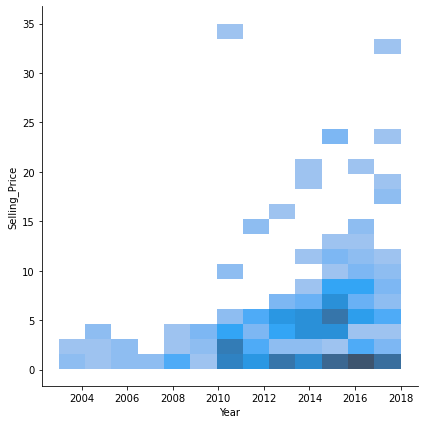

In [12]:
sea.displot(x='Year', y='Selling_Price', data=data, height=6)

<AxesSubplot:>

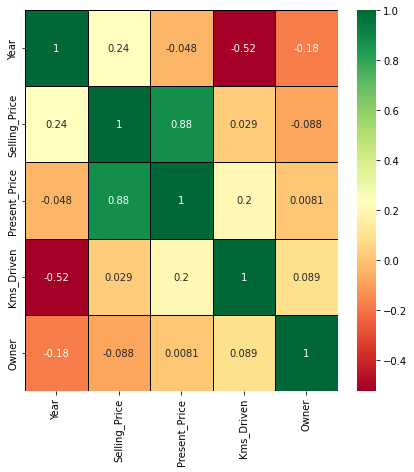

In [13]:
plt.figure(figsize=(7,7))#Correlation check 
sea.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=1, linecolor='black')

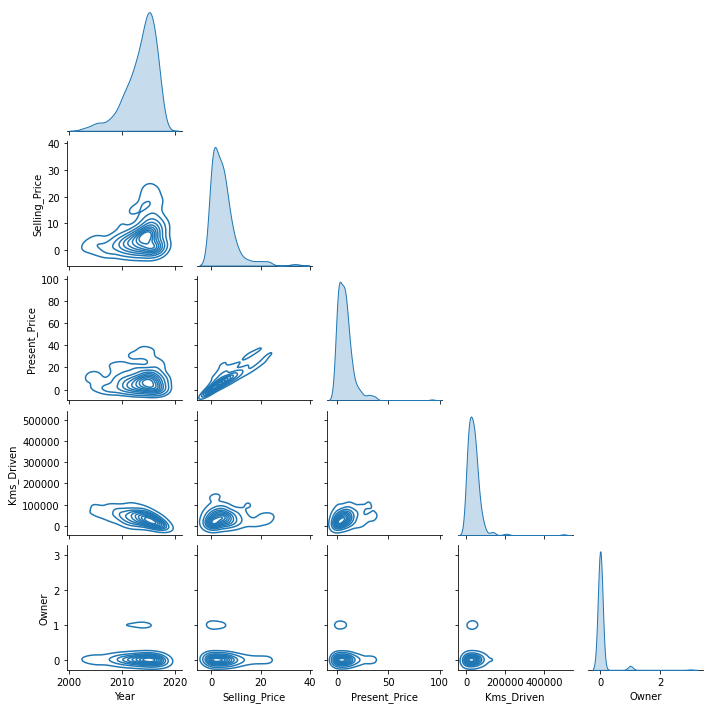

In [14]:
sea.pairplot(data, corner=True, kind="kde", height=2)

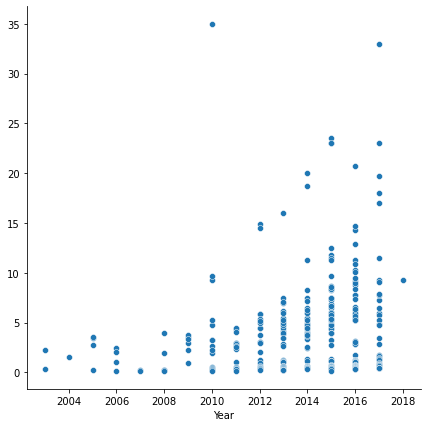

In [15]:
sea.pairplot(data,x_vars=["Year"],y_vars=["Selling_Price"],corner=True, height=6)

# Feature Engineering

In [16]:
#Remove rows which haveing 20% of missing values and empty values
col_num=0
TotalObjects = data.shape[0]
print("Column\t\t\t\t\t Null Values%")
for x in data:
    nullCount = data[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 20 :
        col_num=col_num+1
        data.drop(x,axis=1,inplace=True)
        print(str(x)+"\t\t\t\t\t "+str(nullPercent))
        print("A total of "+str(col_num)+" deleted !")

Column					 Null Values%


In [17]:
import datetime
Current = datetime.datetime.now().year
data['Used_Years']=Current-data['Year'] #Check how many years car being used

In [18]:
data.drop(['Car_Name','Year'],axis=1, inplace=True)

In [19]:
data['Fuel_Type'].replace(to_replace=['Petrol', 'Diesel', 'CNG'], value=[0, 1, 2], inplace=True)
data['Seller_Type'].replace(to_replace=['Dealer', 'Individual'], value=[0, 1], inplace=True)
data['Transmission'].replace(to_replace=['Manual', 'Automatic'], value=[0, 1], inplace=True)

In [20]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Used_Years
0,3.35,5.59,27000,0,0,0,0,8
1,4.75,9.54,43000,1,0,0,0,9
2,7.25,9.85,6900,0,0,0,0,5
3,2.85,4.15,5200,0,0,0,0,11
4,4.60,6.87,42450,1,0,0,0,8


# Feature selection

In [21]:
Depend=data.iloc[:,1:] #dependent variables and independent variables
Independent=data.iloc[:,0]

In [22]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(Depend,Independent)

ExtraTreesRegressor()

<AxesSubplot:>

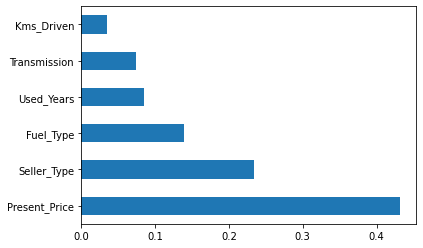

In [23]:
#Identify features related to dataset
pd.Series(model.feature_importances_, index=Depend.columns).nlargest(6).plot(kind='barh')

<AxesSubplot:>

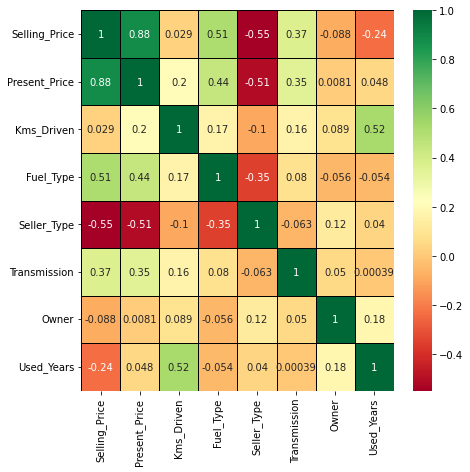

In [24]:
#Use heatmap to correlation check 
plt.figure(figsize=(7,7))#Correlation check 
sea.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=1, linecolor='black')

In [25]:
#Save the clened dataset
data.to_csv('cleaned_data.csv', index=False,encoding='utf-8')

# Model build

In [26]:
X= Depend
y= Independent

In [27]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
#Add randomforestregressor and get parameters
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
rf_random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
#Add random parameters
import numpy as np
values=range(100,1300,100)
depth=range(5,35,5)

n_estimators=list(values)
max_features=['auto', 'sqrt']
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,8,10]
max_depth=list(depth)
criterion=['mse','mae']

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'min_samples_split':min_samples_split,
               'max_depth':max_depth,
              'criterion':criterion}

In [30]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'criterion': ['mse', 'mae']}


In [31]:
#Use RandomizedCV for hyperparameter generation 
from sklearn.model_selection import RandomizedSearchCV

In [32]:
randomSearch=RandomForestRegressor()

In [33]:
#Use RandomizedCV for randomforestregressor
randomSearch= RandomizedSearchCV(estimator= randomSearch,param_distributions= random_grid,
scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [34]:
randomSearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
#Get best parameters for randomforestregressor
randomSearch.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mae'}